# Images for the readme

This noteboook produces the readme images.

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import laserbeamsize as lbs
%config InlineBackend.figure_format='retina'

### Simple analysis of local image

In [2]:
# file at https://github.com/scottprahl/laserbeamsize/blob/master/docs/t-hene.pgm
    
beam = imageio.imread("t-hene.pgm")
x, y, dx, dy, phi = lbs.beam_size(beam)

print("The center of the beam ellipse is at (%.0f, %.0f)" % (x,y))
print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
print("The ellipse is rotated %.0f° ccw from the horizontal" % (phi*180/3.1416))

The center of the beam ellipse is at (651, 491)
The ellipse diameter (closest to horizontal) is 334 pixels
The ellipse diameter (closest to   vertical) is 327 pixels
The ellipse is rotated 30° ccw from the horizontal


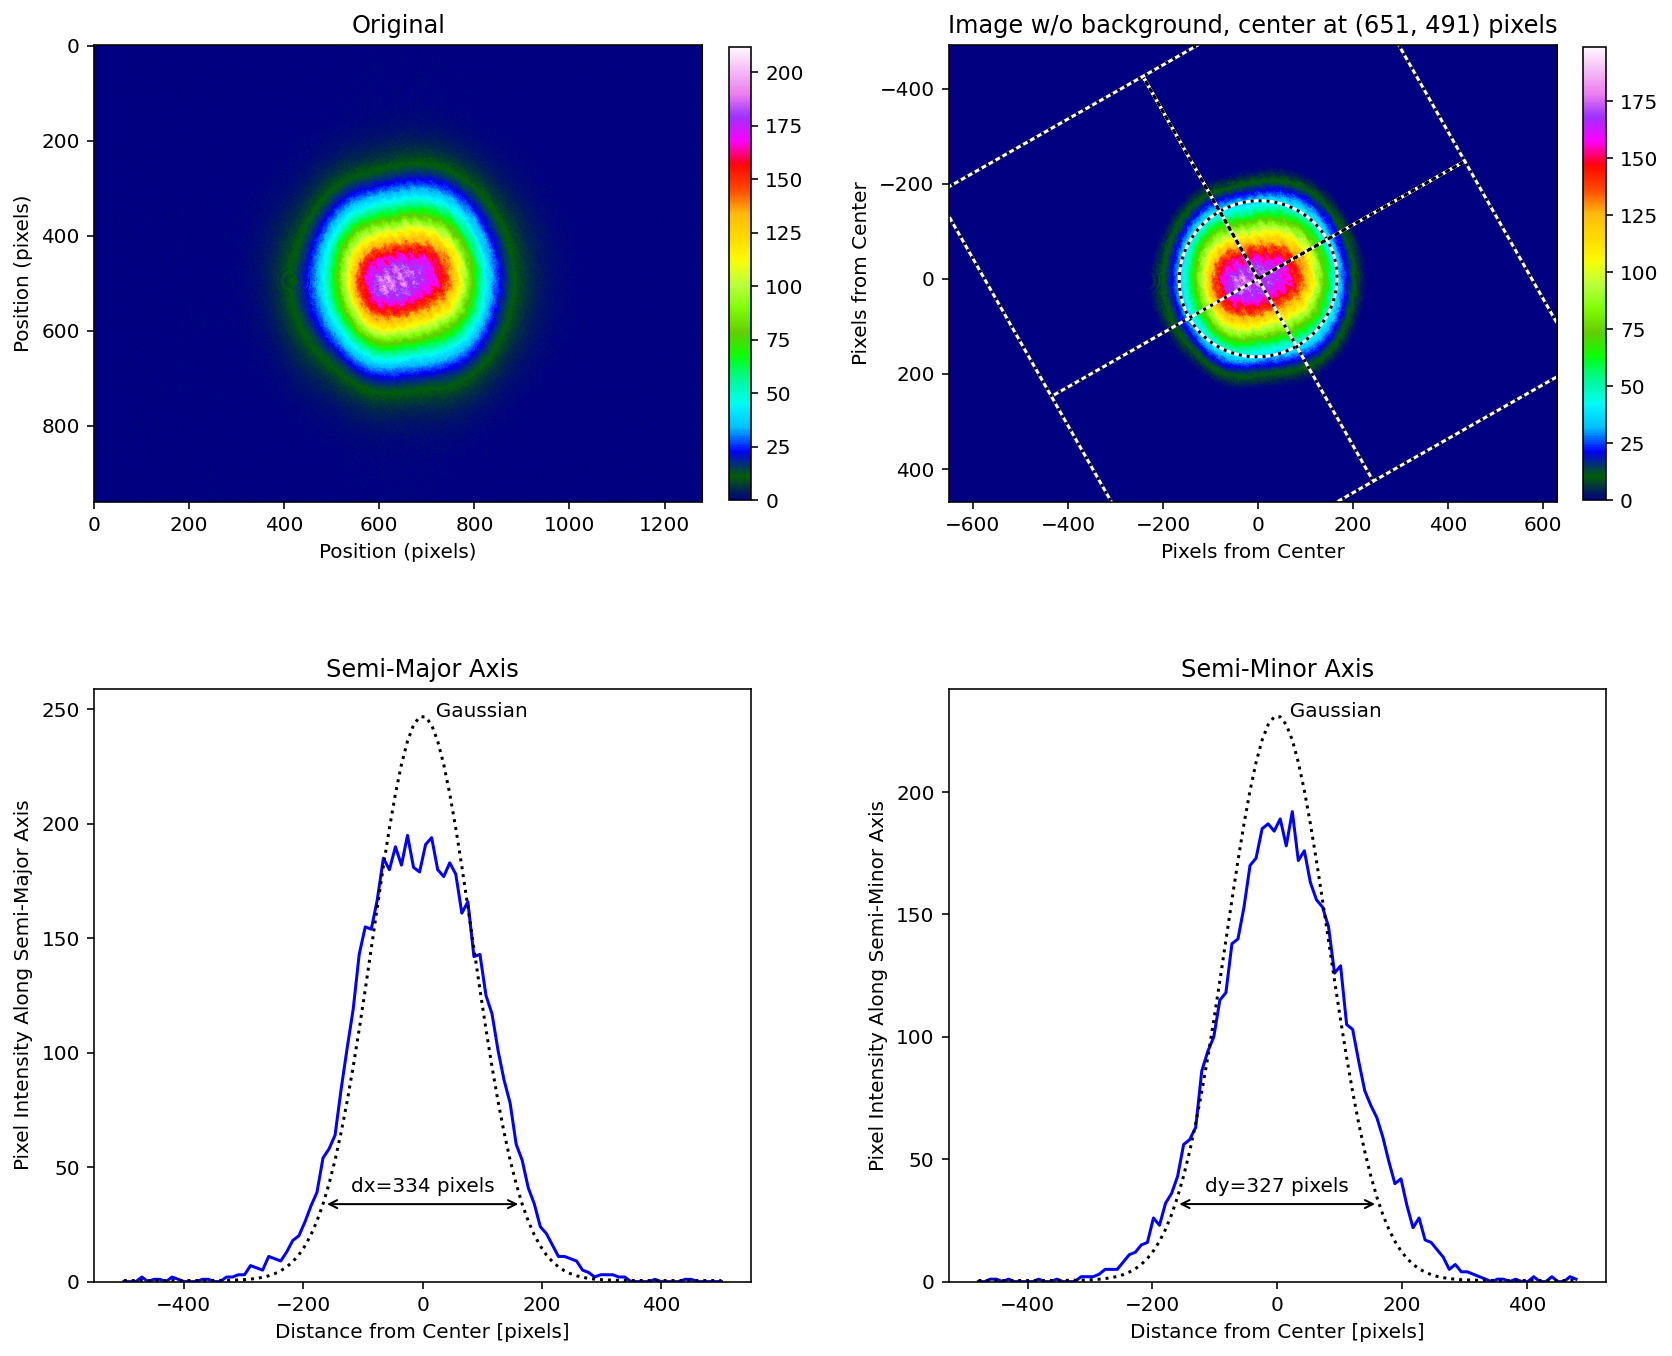

In [3]:
lbs.beam_size_plot(beam)
plt.savefig("hene-report.png", bbox_inches='tight')
plt.savefig("../hene-report.png", bbox_inches='tight')
plt.show()

### Analysis of color image

Just grab a color wikipedia image and slice.

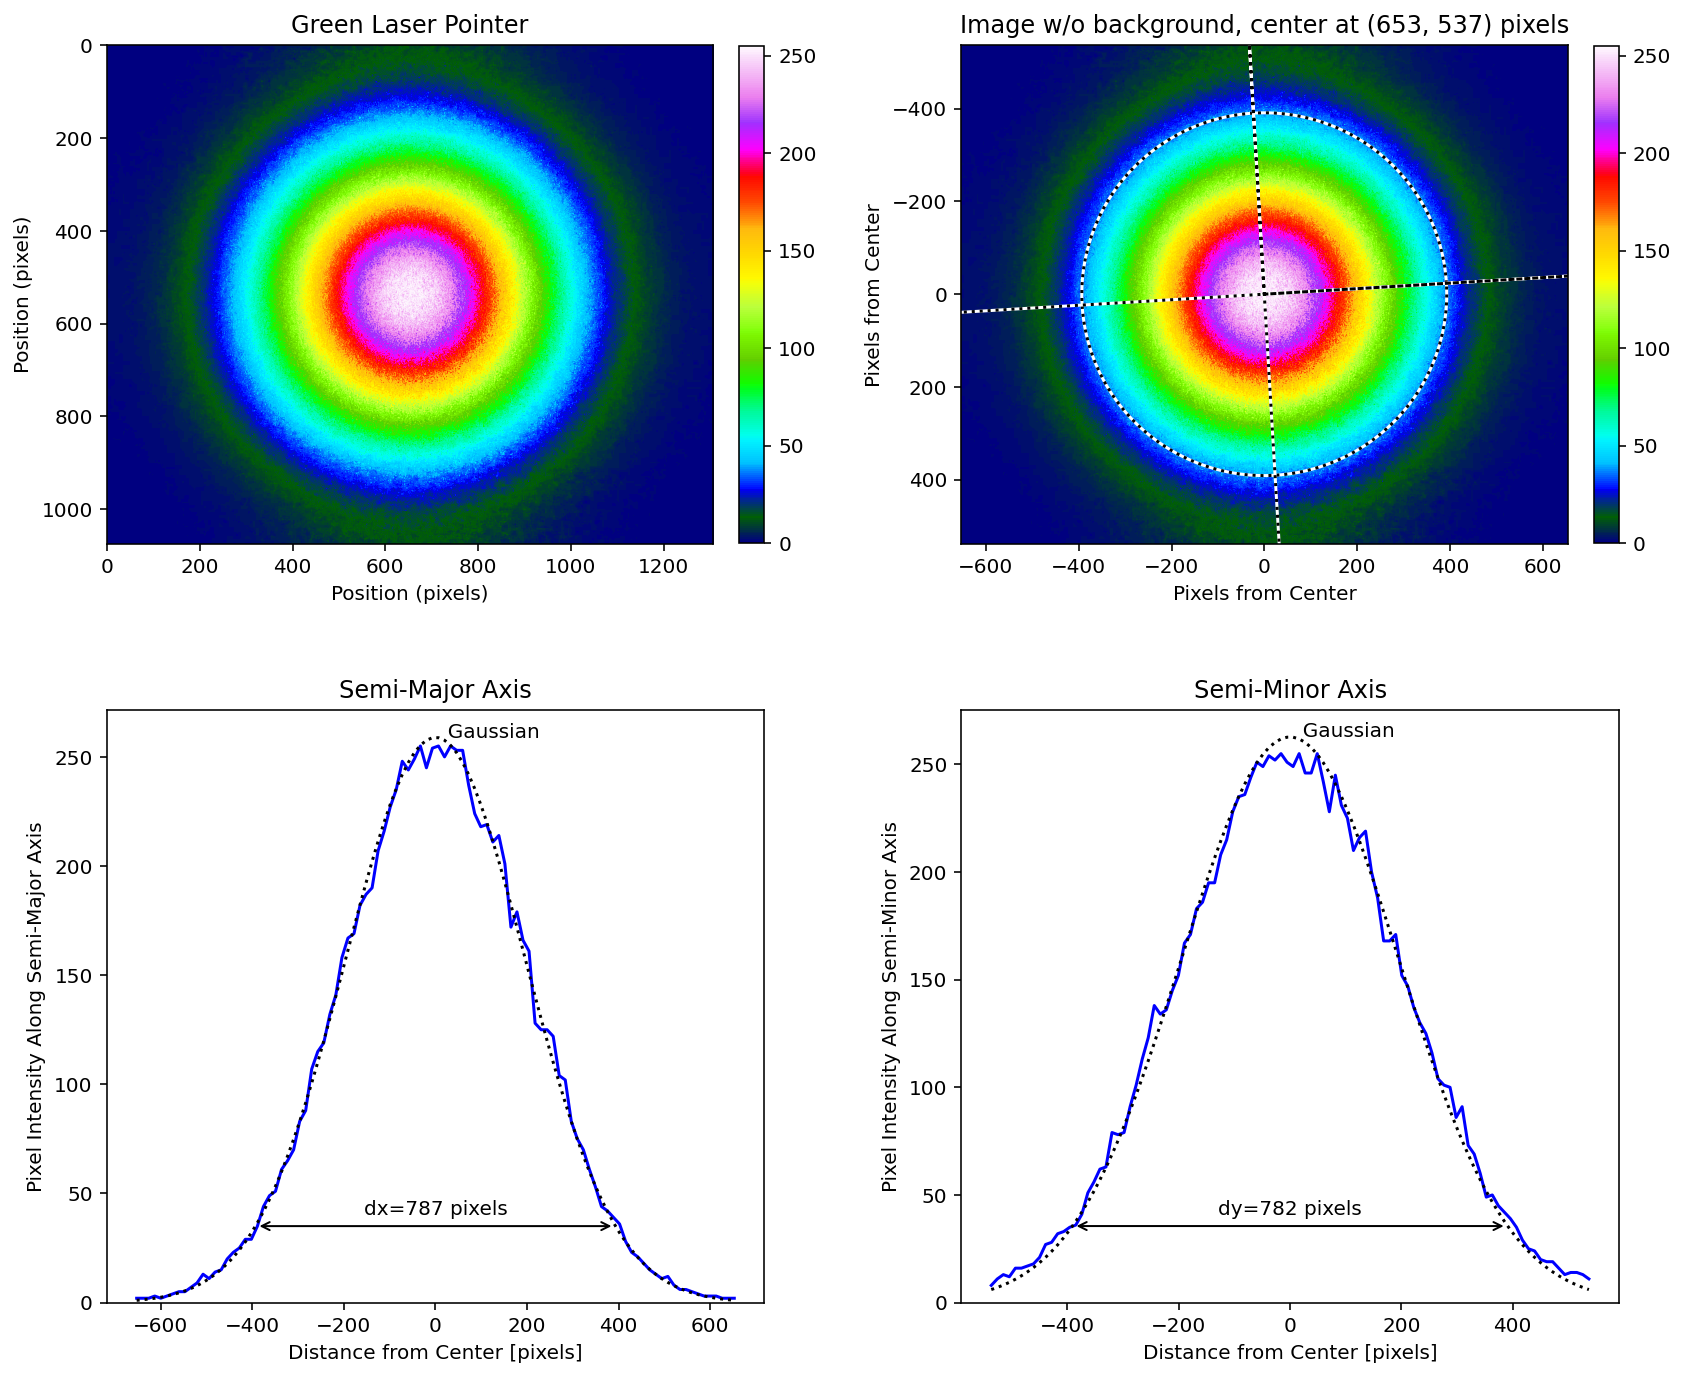

In [4]:
url = 'https://upload.wikimedia.org/wikipedia/commons/7/74/Green_laser_pointer_TEM00_profile.JPG'
beam = imageio.imread(url)
green_channel = beam[:,:,1]
lbs.beam_size_plot(green_channel, "Green Laser Pointer")

### Nice asymmetric image 

This image uncovered a bug with semi-major and semi-minor axis identification.

The image was contributed by Werefkin

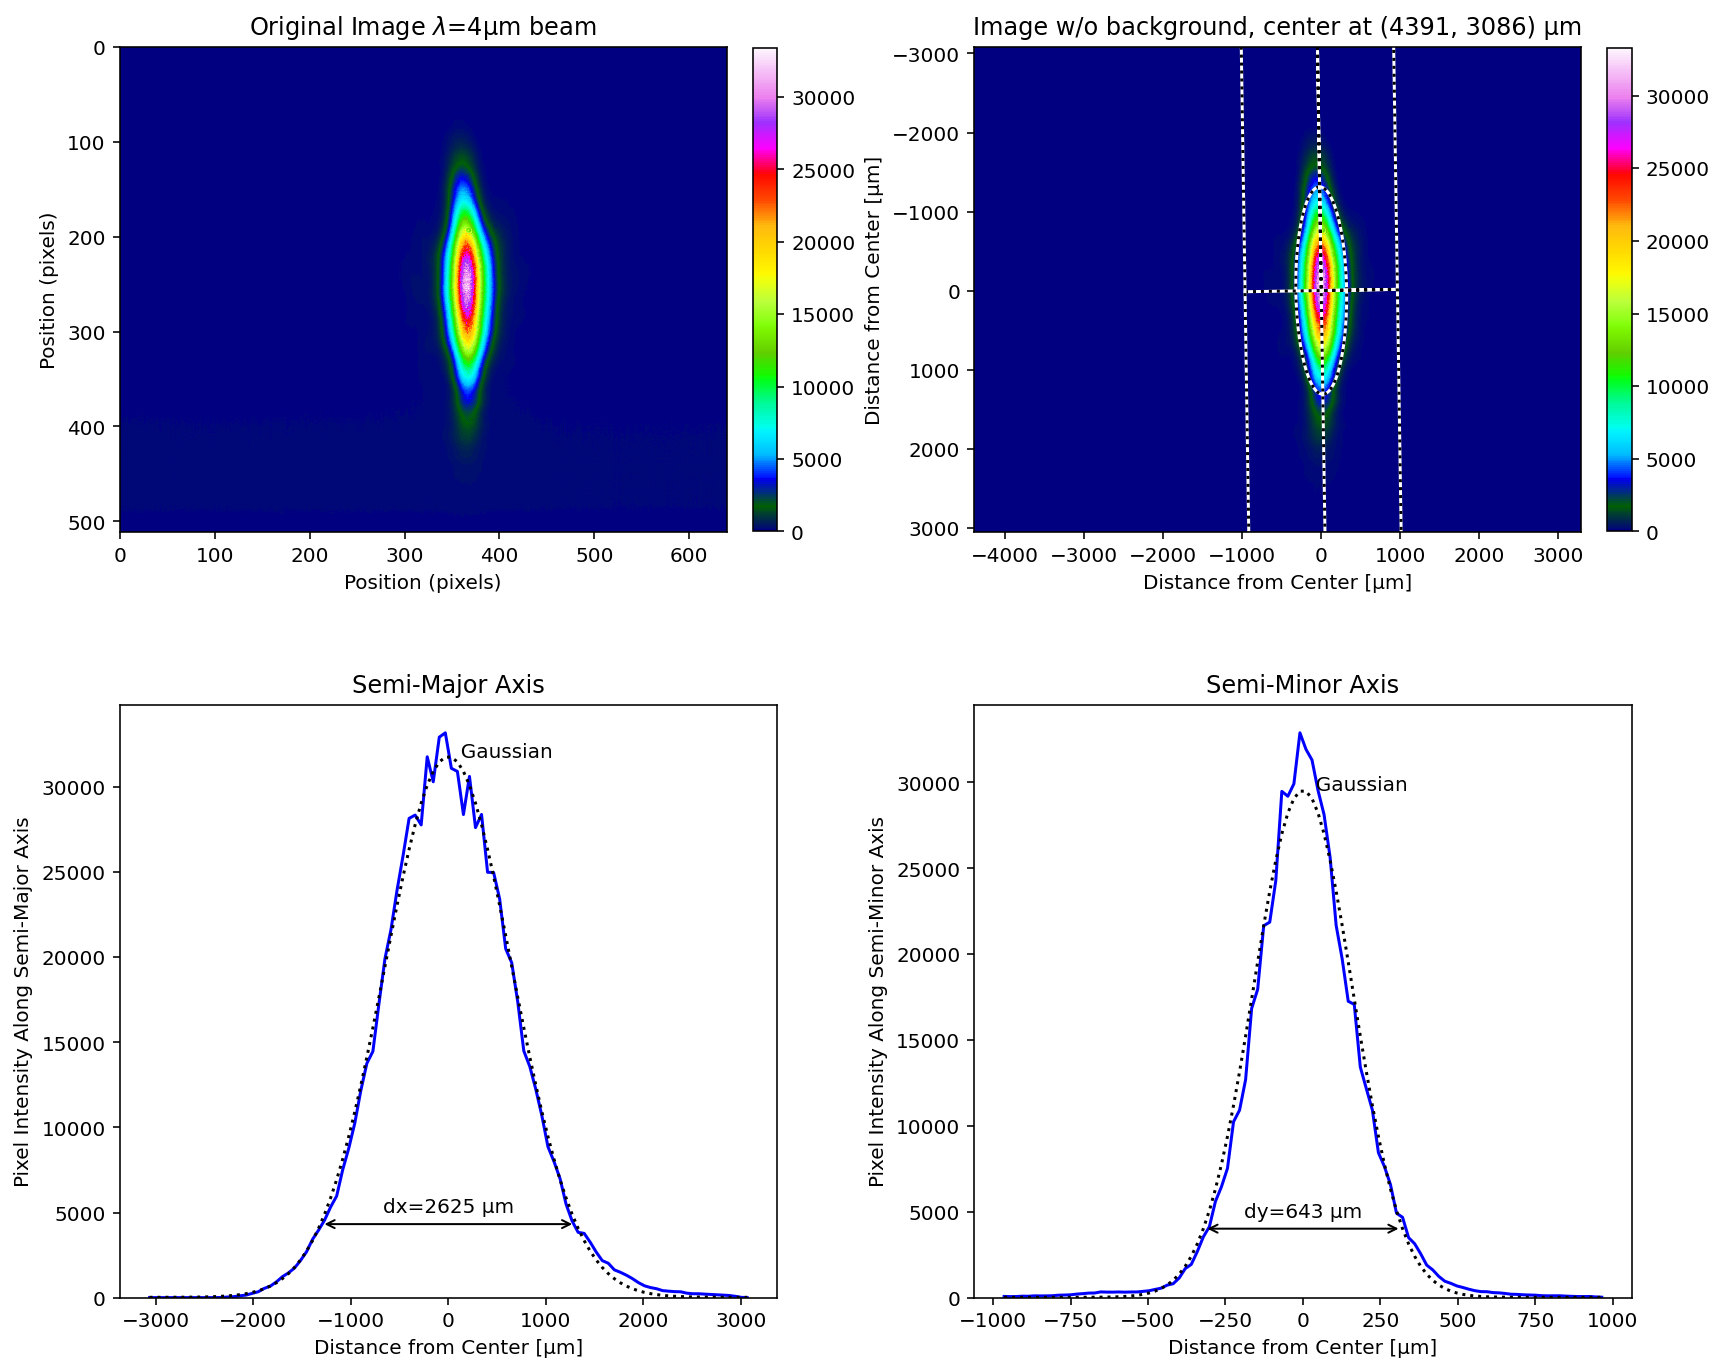

In [5]:
# Created using an f=750 mm spherical mirror for focusing under 45 degrees incidence 
# The pixel size is 12 µm, wavelength is 4 µm (actually it is a polychromatic beam)

beam = np.load("astigmatic_beam_profile.npy")
lbs.beam_size_plot(beam, r"Original Image $\lambda$=4µm beam", pixel_size = 12, units='µm')
plt.savefig("astigmatic-report.png", bbox_inches='tight')
plt.savefig("../astigmatic-report.png", bbox_inches='tight')
plt.show()

### 12 bit image stored as 16 bit values

The 12-bit pixel image stored as high-order bits in 16-bit values

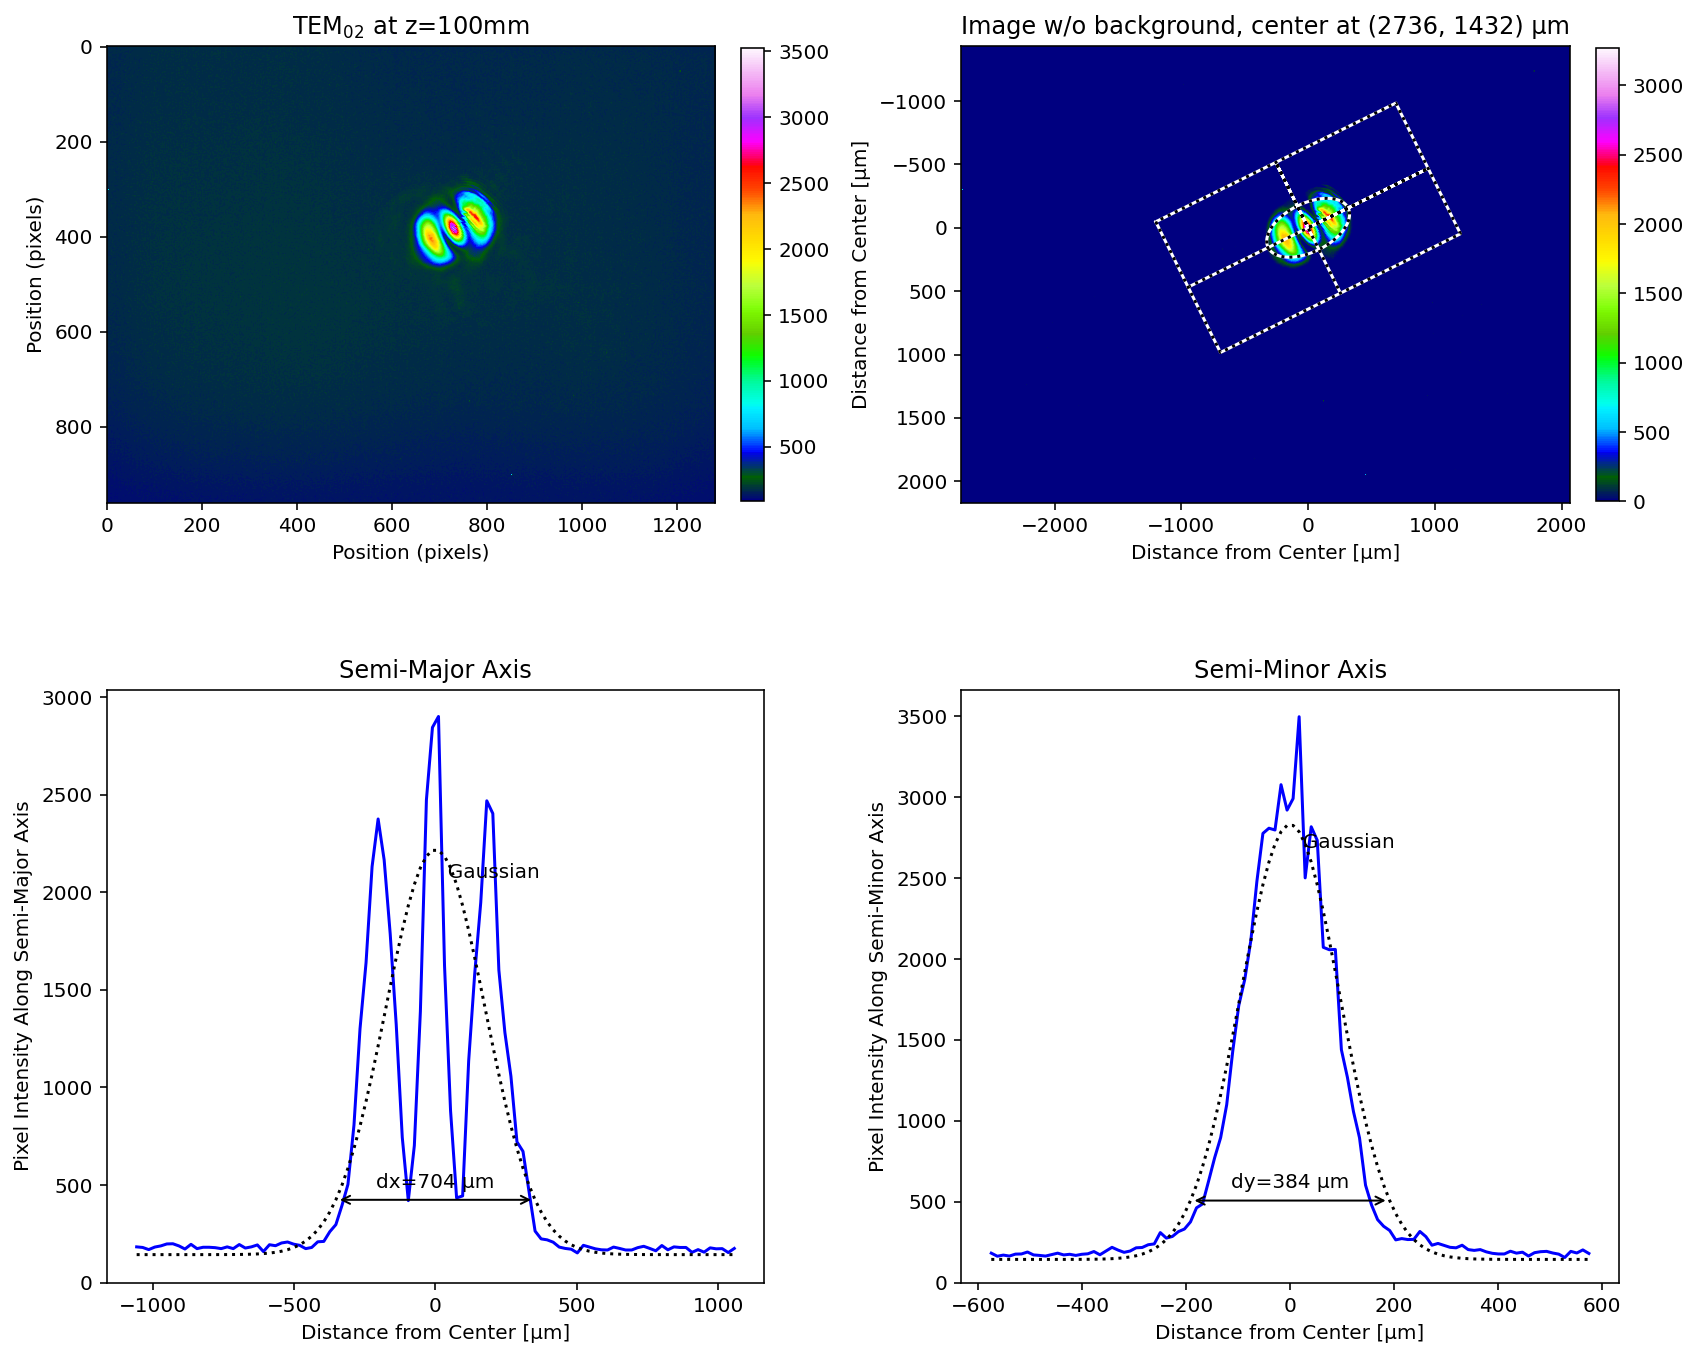

In [6]:
tem02 = imageio.imread("TEM02_100mm.pgm") >> 4
lbs.beam_size_plot(tem02, title = r"TEM$_{02}$ at z=100mm", pixel_size=3.75)
plt.savefig("tem02.png", bbox_inches='tight')
plt.savefig("../tem02.png", bbox_inches='tight')
plt.show()

### M² analysis

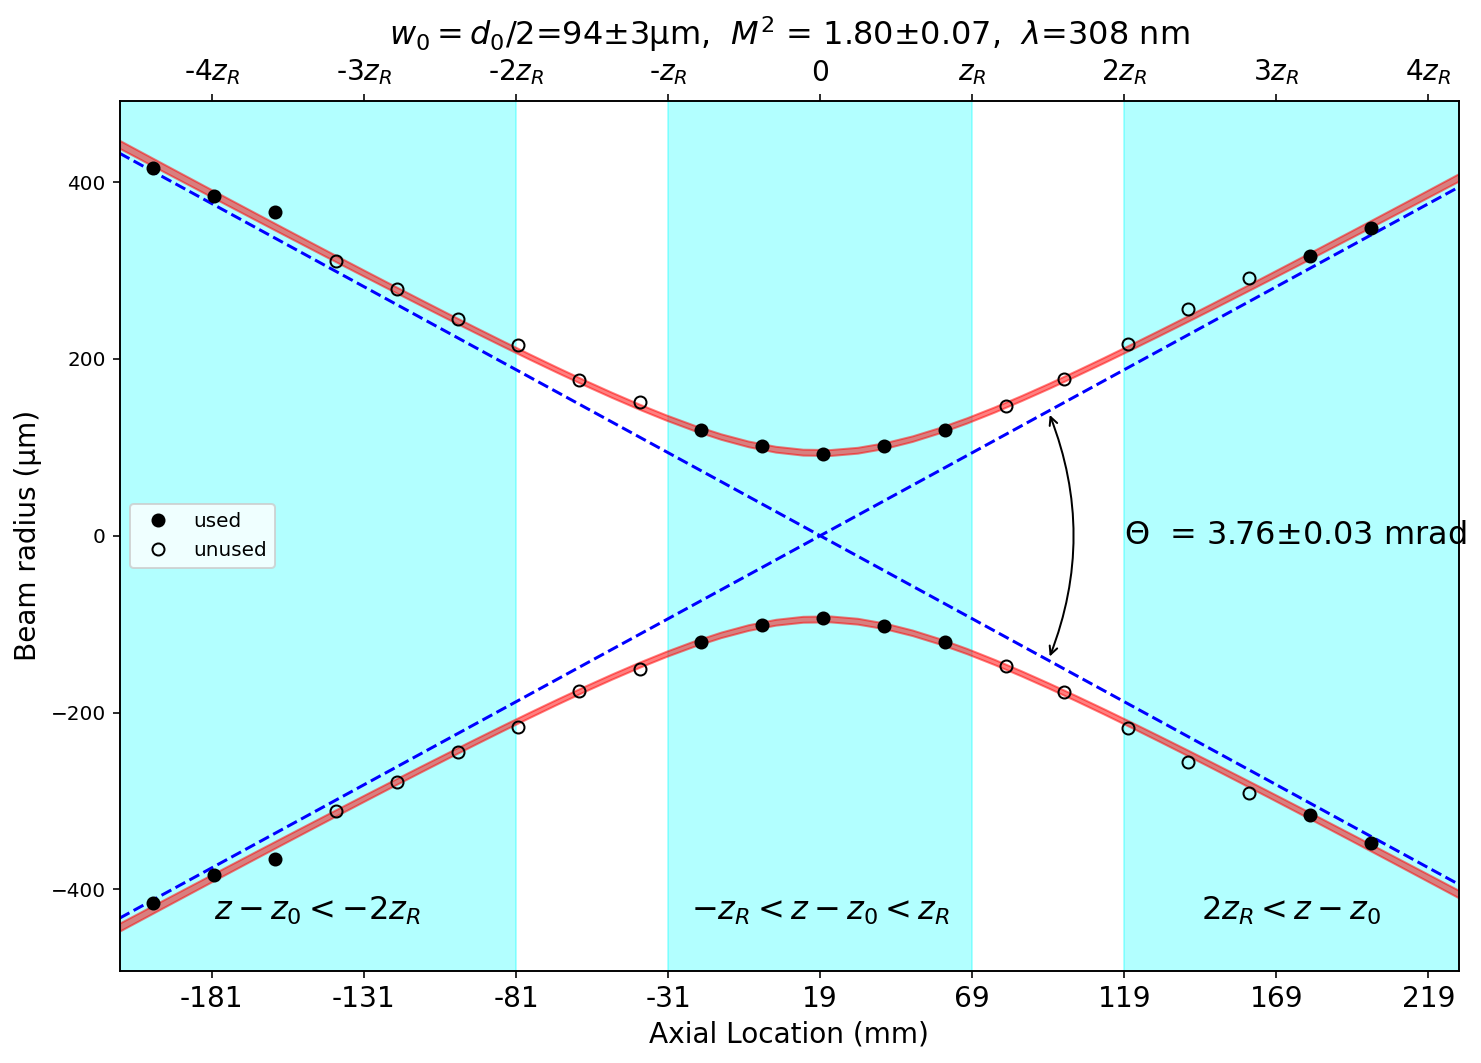

In [7]:
lambda1=308e-9 # meters
z1_all=np.array([-200,-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20,40,60,80,99,120,140,160,180,200])*1e-3
d1_all=2*np.array([416,384,366,311,279,245,216,176,151,120,101,93,102,120,147,177,217,256,291,316,348])*1e-6
lbs.M2_radius_plot(z1_all, d1_all, lambda1, strict=True)
plt.savefig("m2fit.png", bbox_inches='tight')
plt.savefig("../m2fit.png", bbox_inches='tight')

plt.show()

### Montage of beam image analysis

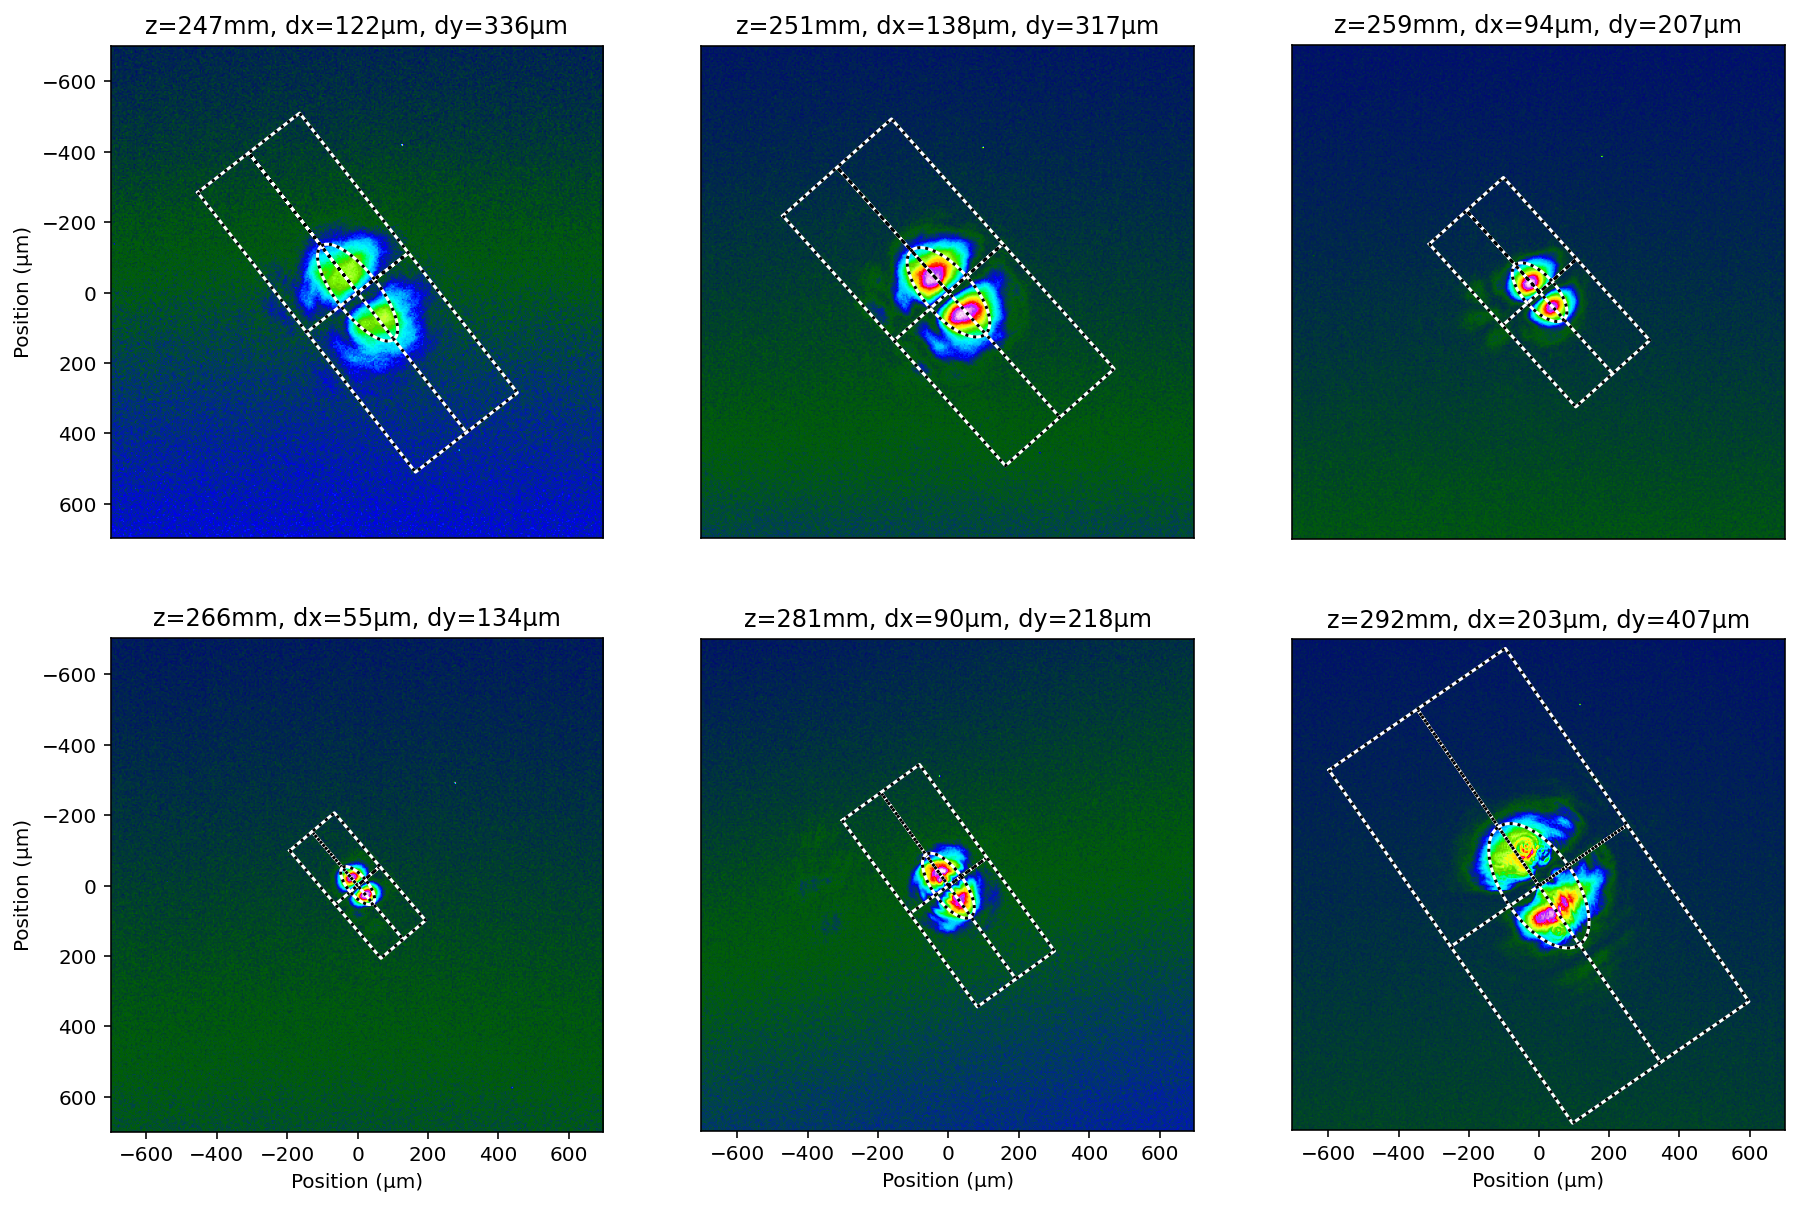

In [8]:
lambda0 = 632.8e-9 # meters
z10 = np.array([247,251,259,266,281,292])*1e-3 # meters
filenames = ["sb_%.0fmm_10.pgm" % (number*1e3) for number in z10]

# the 12-bit pixel images are stored in high-order bits in 16-bit values
tem10 = [imageio.imread(name)>>4 for name in filenames]

# remove top to eliminate artifact 
for i in range(len(z10)):
    tem10[i] = tem10[i][200:,:]

# find beam in all the images and create arrays of beam diameters
options = {'pixel_size': 3.75, 'units': "µm", 'crop': [1400,1400], 'z':z10}
dy, dx= lbs.beam_size_montage(tem10, **options)  # dy and dx in microns
plt.savefig("sbmontage.png", bbox_inches='tight')
plt.savefig("../sbmontage.png", bbox_inches='tight')

plt.show()

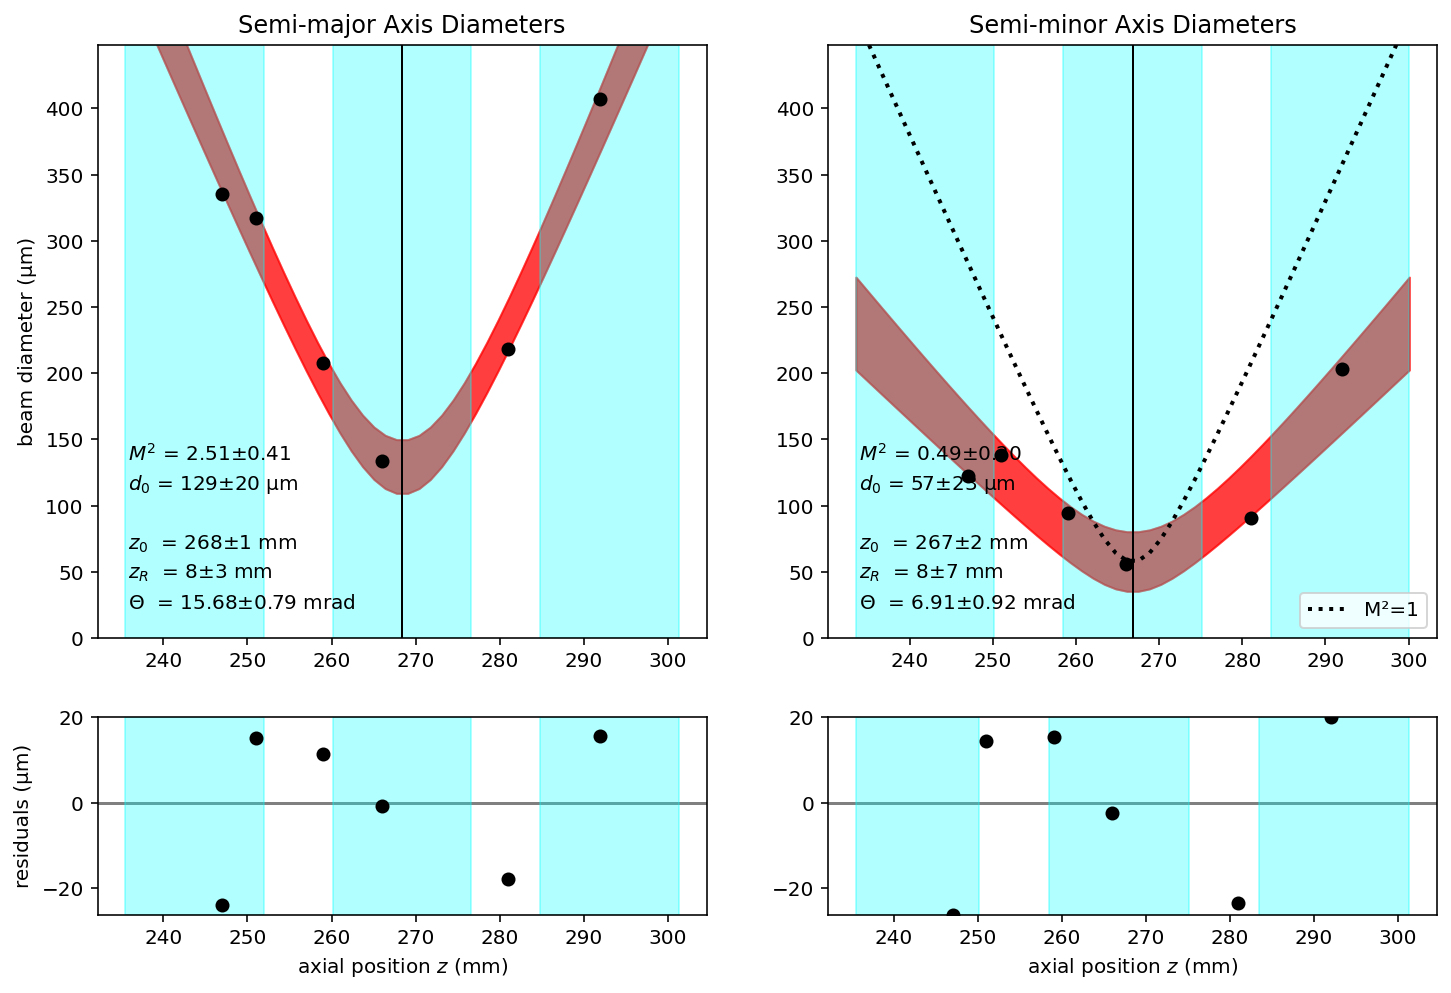

In [9]:
# fit and show 
lbs.M2_diameter_plot(z10, dx*1e-6, lambda0, dy=dy*1e-6)
plt.savefig("sbfit.png", bbox_inches='tight')
plt.savefig("../sbfit.png", bbox_inches='tight')